# Ch6. 트리 기반 기법

[6.1] 단순트리
의사결정 트리: 데이터셋을 동질적인 클러스터로 분할
: 외생변수 Y(ex. 실적), 특성 X(ex. 팩터) ~ 가능한 한 Y가 동질적인 그룹을 형성하도록, 특정 집합 X 내의 한 변수에 따라 분할이 이루어짐
- Y: 실수 = 회귀 트리, 번주형 = 분류 트리
1. 각각의 특성 $x^{(k)}_i$에 대해 클러스터: Y가 균일해지도록 하는 최적의 분할점 찾음
2. 가장 높은 수준의 동질성 달성하는 특성 선택
- 회귀 트리의 동질성 ~ 분산 => 각 클러스터 내부의 $y_i$가 유사하기를 원함: 각 클러스터 내부의 변화량(variability)/확산(dispersion) 최소화

(*) 각 특성에 대한 최적의 분할 찾기: $argmin_{c^{(k)}}V^{(k)}_I(c^{(k)})$
$V^{(k)}_I(c^{(k)})=\sum_{x^{(k)}_i<c^{(k)}}(y_i-m^{k,-}_I(c^{(k)}))^2+\sum_{x^{(k)}_i>c^{(k)}}(y_i-m^{k,+}_I(c^{(k)}))^2$
=> 첫 번째 클러스터의 총 확산 + 두 번째 클러스터의 총 확산
$m^{k,-}_I(c^{(k)})=\frac{1}{\#\{i,x_i^{(k)}<c^{(k)}\}} \sum_{\{x^{(k)}_i<c^{(k)}\}} y_i$

- 특성 k에 대한 최적 분할 $c^{k,*}=V^{(k)}_I(c^{(k)})$: 두 하위 그룹에 대한 총 확산이 가장 작은 분할
- 모든 분할뿐만 아니라 $k^*=argmin_k V_I^{(k)}(c^{k,*})와 같이 모든 변수에 대한 총 확산도 최소화 
- 한 번의 분할 수행된 후, 새로 형성된 2개의 클러스터에서 똑같은 절차 계속
- 트리 만들어지면(학습되면) 새로운 인스턴스에 대한 예측 쉽게 가능: 특성값 주어지면 인스턴스는 트리의 한 잎사귀에 속하게 됨
- 각 잎사귀에는 레이블의 평균값이 있음: 예측 결과

- 출력 $\overline{y}_i$: 레이블 범주의 개수만큼의 요소 가짐 -> 각 요소: 인스턴스가 해당 범주에 속할 확률
- 알고리즘은 순도(purity)를 추구함: 가능한 한 순수한 클러스터 ~ 매우 지배적인 클래스가 하나이거나 적어도 몇 개만 있는 클러스터로 이어지는 분할 기준 찾기
- J개의 클래스가 있는 경우 ~ 출력값에서 생성된 비율 $p_j$를 기반으로 하는 지표들 :
1. 지니 순도 지수: $1-\sum^J_{j=1}p^2_j$
- 지니 지수= 1 - (포트폴리오의 분산 정도를 측정하는 허핀달 지수)
2. 오분류 오차: $1-max_jp_j$
3. 엔트로피: -\sum^J_j log(p_j)p_j$
- 새 인스턴스가 잎사귀에 연결될 때 가장 높은 비율(확률)을 가진 클래스를 선택함

[6.1.3] 가지치기의 기준
- 트리 만들 때 전체 트리가 성장할 때까지 분할 프로세스 진행될 수 있음: 
=> 모든 인스턴스가 개별적인 잎사귀에 속함
=> 모든 잎이 현재 특성 집합을 기반으로 더 이상 분리할 수 없는 인스턴스로 구성됨
--- 더이상 프로세스 진행 x
-> 완전히 자란 트리: 거의 완벽한 적합도 보이는 경우 있음
- but 트리에서 가장 신뢰할 수 있는 부분: 뿌리에서 가장 가까운 부분 ~ 데이터의 상당량을 포함하고 있기 때문
=> 1st 분할: 가장 일반적인 패턴 강조 ~ 가장 중요한 분할
- 트리 크기 제한 필수적:
1. 각 최종 노드에 최소 인스턴스 수 부과 
2. 각 틀러스터의 크기가 최소가 되도록
3. 분할이 손실을 충분히 줄이지 못하면 분할: 불필요 -> 분할 후 얻은 손실이 분할 전 손실의 $1-\epsilon$ 배보다 작은 경우에만 유효
4. 트리의 깊이 제한 ~ 깊이: 트리의 뿌리 & 모든 잎사귀 사이의 전체 최대 분할 수로 정의

Index(['stock_id', 'date', 'Advt_12M_Usd', 'Advt_3M_Usd', 'Advt_6M_Usd',
       'Asset_Turnover', 'Bb_Yld', 'Bv', 'Capex_Ps_Cf', 'Capex_Sales',
       'Cash_Div_Cf', 'Cash_Per_Share', 'Cf_Sales', 'Debtequity', 'Div_Yld',
       'Dps', 'Ebit_Bv', 'Ebit_Noa', 'Ebit_Oa', 'Ebit_Ta', 'Ebitda_Margin',
       'Eps', 'Eps_Basic', 'Eps_Basic_Gr', 'Eps_Contin_Oper', 'Eps_Dil', 'Ev',
       'Ev_Ebitda', 'Fa_Ci', 'Fcf', 'Fcf_Bv', 'Fcf_Ce', 'Fcf_Margin',
       'Fcf_Noa', 'Fcf_Oa', 'Fcf_Ta', 'Fcf_Tbv', 'Fcf_Toa', 'Fcf_Yld',
       'Free_Ps_Cf', 'Int_Rev', 'Interest_Expense', 'Mkt_Cap_12M_Usd',
       'Mkt_Cap_3M_Usd', 'Mkt_Cap_6M_Usd', 'Mom_11M_Usd', 'Mom_5M_Usd',
       'Mom_Sharp_11M_Usd', 'Mom_Sharp_5M_Usd', 'Nd_Ebitda', 'Net_Debt',
       'Net_Debt_Cf', 'Net_Margin', 'Netdebtyield', 'Ni', 'Ni_Avail_Margin',
       'Ni_Oa', 'Ni_Toa', 'Noa', 'Oa', 'Ocf', 'Ocf_Bv', 'Ocf_Ce', 'Ocf_Margin',
       'Ocf_Noa', 'Ocf_Oa', 'Ocf_Ta', 'Ocf_Tbv', 'Ocf_Toa', 'Op_Margin',
       'Op_Prt_Margin', 'Oper_Ps_Net_

<string>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<string>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


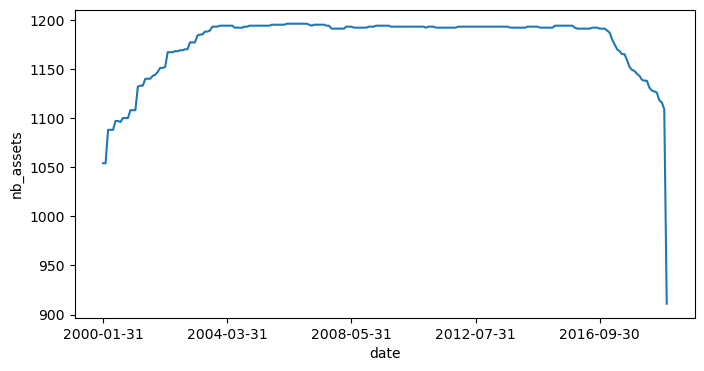

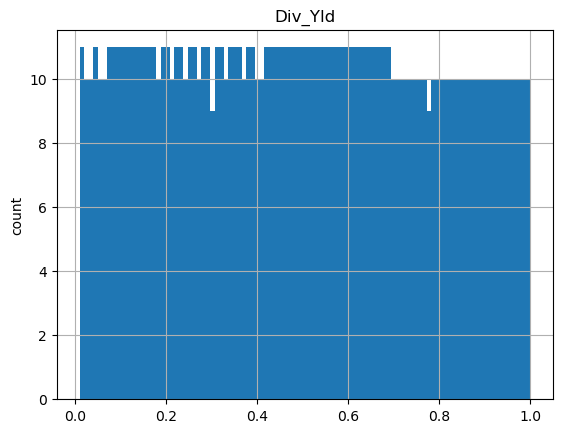

In [1]:
# 레이블: 향후 1개월 수익률
# 특성: 샘플에서 사용 가능한 모든 예측 인자
# 각 노드에서 조건은 Boolean 표현식으로 분할 설명 -> if True: 왼쪽 클러스터로 이동 o/w 오른쪽
from sklearn import tree # 트리 모듈
import import_ipynb
from Ch1 import data_ml

In [2]:
X=data_ml.iloc[:,3:95] # 특성/예측 인자
y=data_ml['R1M_Usd'] # 레이블/종속 변수

In [3]:
fit_tree=tree.DecisionTreeRegressor( # 모델 정의
    min_samples_split=8000, # 분할 지속 위한 최소 관측치 개수
    max_depth=3, # 최대 깊이(: 트리 레벨) ~ 최대 3번의 분할이 있어야 함
    ccp_alpha=0.000001, # 복잡도 매개 변수: 분할 전의 0.9999배 이하로 손실 줄여야 함
    min_samples_leaf=3500 # 각 최종 노드에 필요한 관측치 최소 개수(나뭇잎)
)

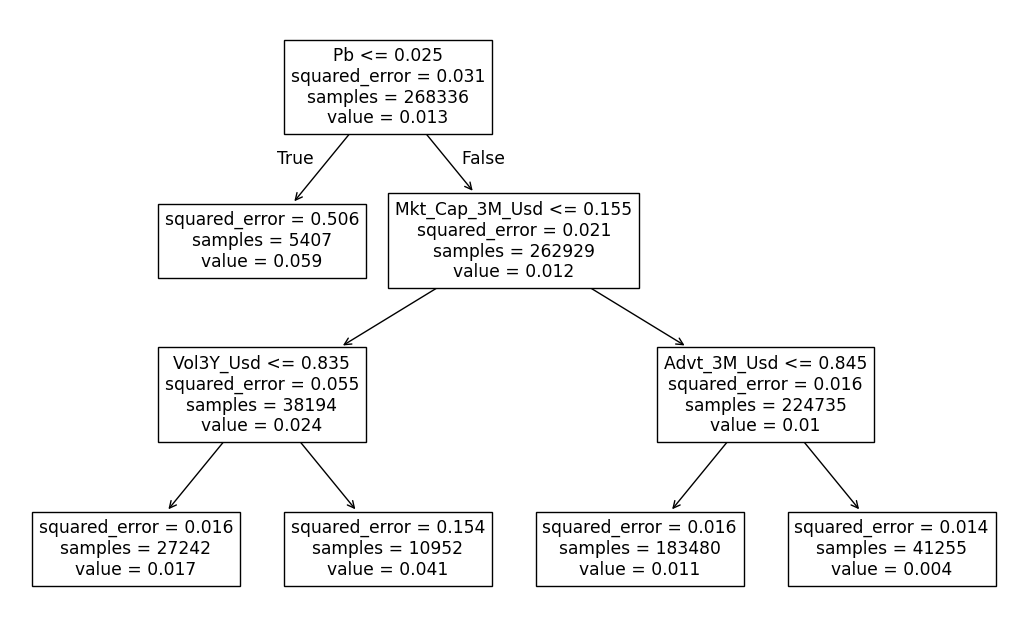

In [4]:
import matplotlib.pyplot as plt
fit_tree.fit(X,y) # 모델 피팅
fig, ax=plt.subplots(figsize=(13,8))
tree.plot_tree(fit_tree, feature_names=X.columns.values, ax=ax)
plt.show()

In [5]:
# 모델이 학습을 마치면(: 트리가 성장하면) 인스턴스에 대한 예측: 인스턴스가 위치해야 하는 클러스터 내 레이블의 평균값(= value)
y_pred=fit_tree.predict(X.iloc[0:6,:])
print(f'y_pred: {y_pred}')

y_pred: [0.01088066 0.01088066 0.01088066 0.01088066 0.04133053 0.04133053]


<Figure size 18000x6000 with 0 Axes>

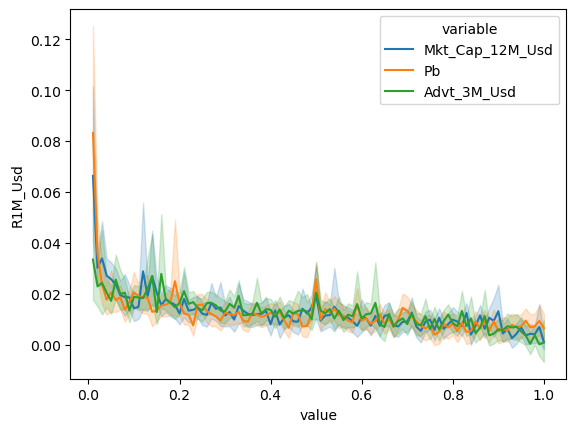

<Figure size 18000x6000 with 0 Axes>

In [6]:
import pandas as pd
unpivoted_data_ml=pd.melt(
    data_ml[['R1M_Usd','Mkt_Cap_12M_Usd','Pb','Advt_3M_Usd']],
    id_vars='R1M_Usd'
) # 형태 바꿈
import seaborn as sns
sns.lineplot(data=unpivoted_data_ml, y='R1M_Usd', x='value', hue='variable')
plt.figure(figsize=(15,5),dpi=1200)

MSE: 0.03699695809185003
Hit Ratio: 0.5460346399270738


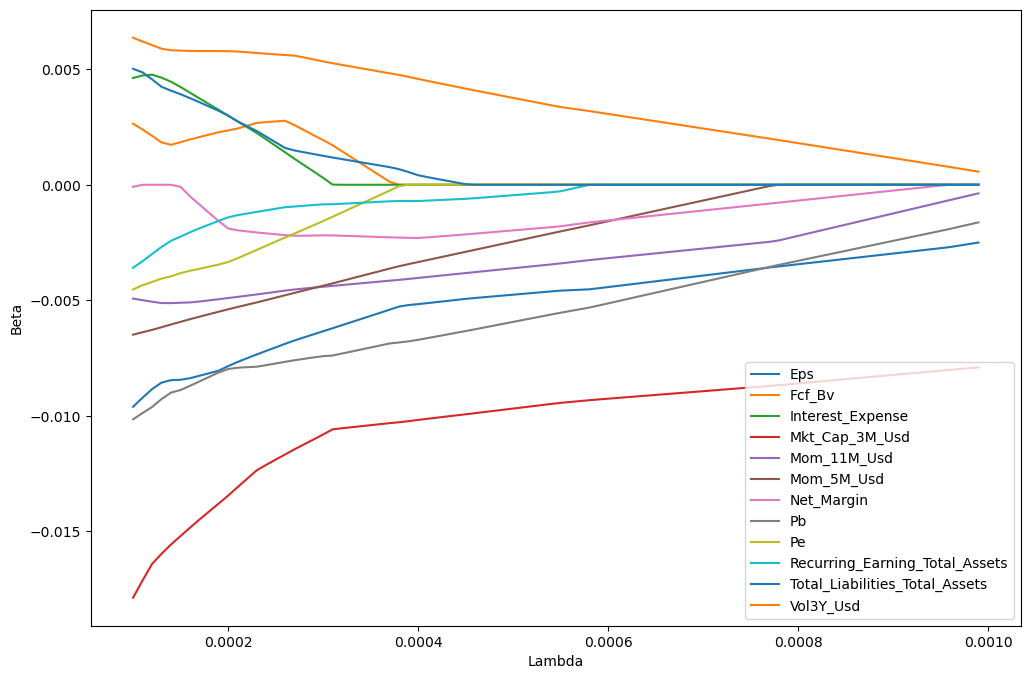

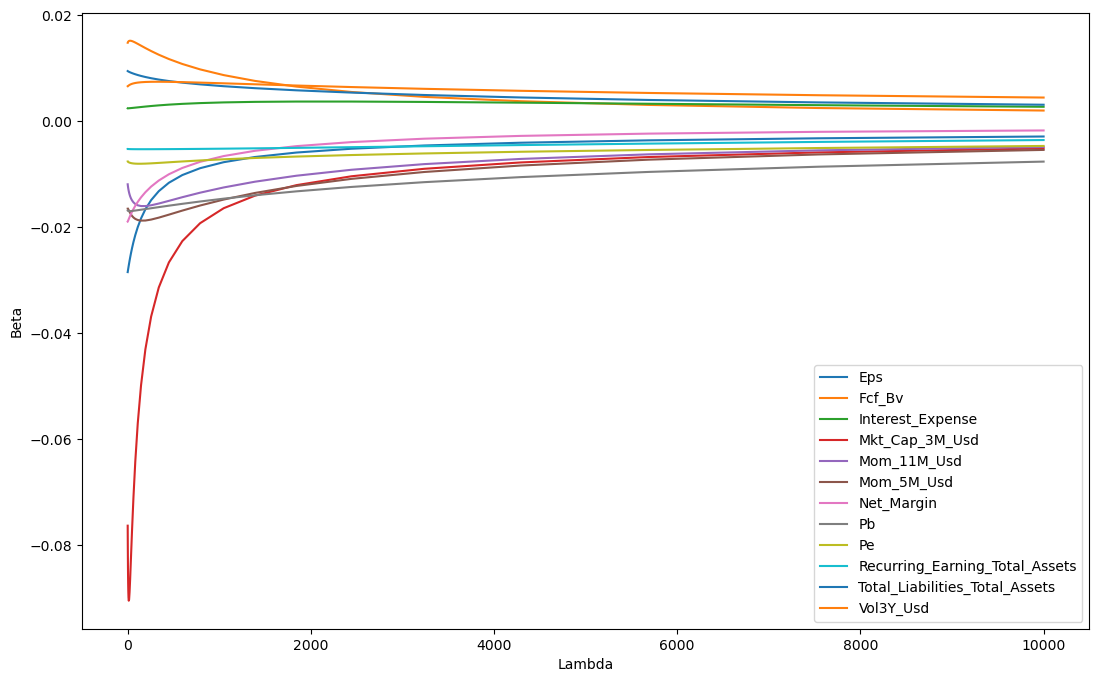

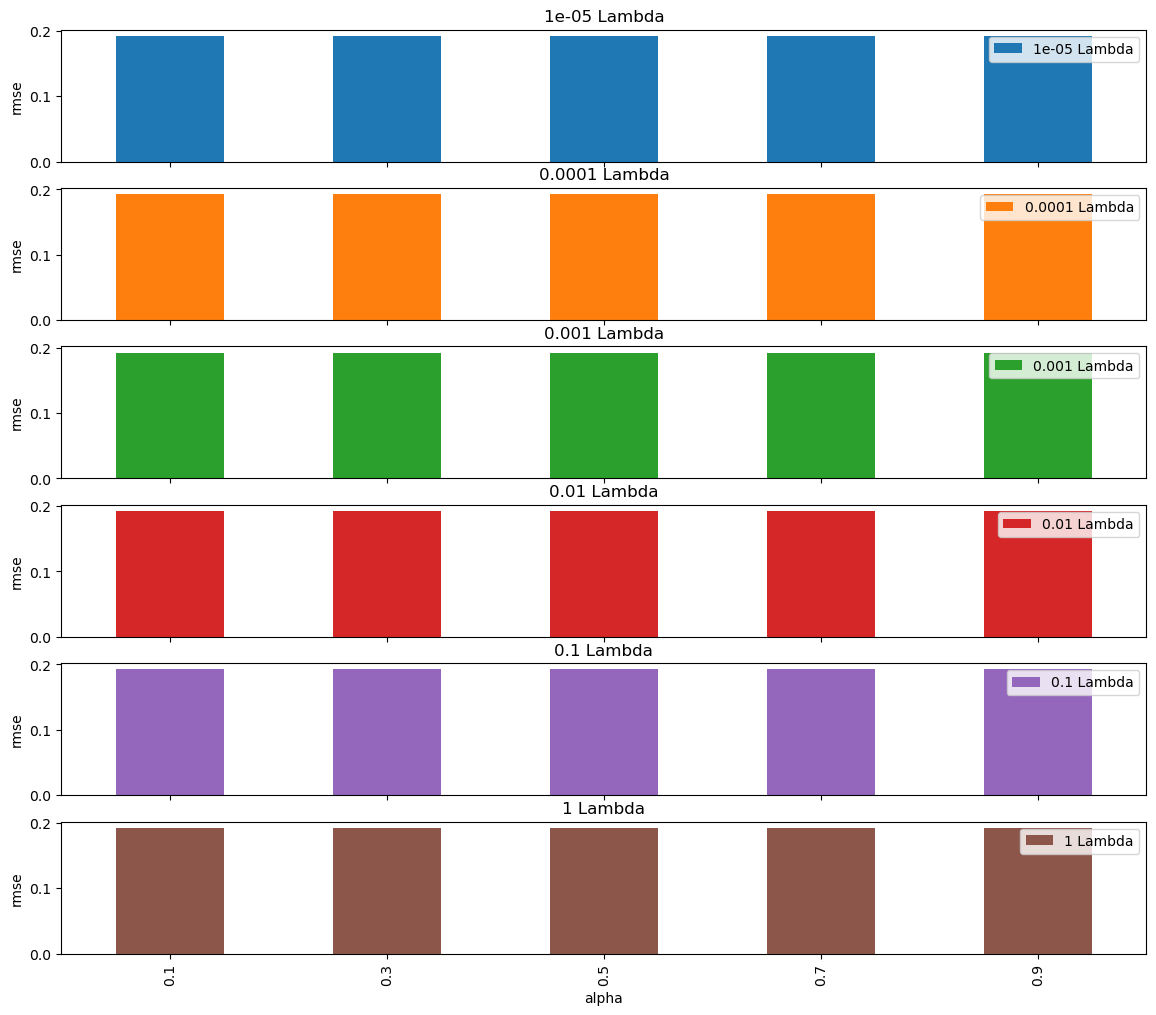

In [7]:
# 테스트셋에서 단일 트리의 예측 품질 평가
from Ch1 import features
from Ch5 import training_sample, testing_sample
y_train=training_sample['R1M_Usd'].values
X_train=training_sample[features].values

y_test=testing_sample['R1M_Usd'].values
X_test=testing_sample[features].values

fit_tree2=tree.DecisionTreeRegressor(
    min_samples_split=4000,
    max_depth=5,
    ccp_alpha=0.0001,
    min_samples_leaf=1500
)

In [8]:
fit_tree2=fit_tree2.fit(X_train, y_train) # 모델 피팅
import numpy as np
mse=np.mean((fit_tree2.predict(X_test)-y_test)**2)
print(f'MSE: {mse}')

MSE: 0.036996958091850024


In [9]:
# 적중률
hitratio=np.mean(fit_tree2.predict(X_test)*y_test>0)
print(f'Hit Ratio: {hitratio}')
# 벤치마크의 임계치: 최소 52%

Hit Ratio: 0.5460346399270738


[6.2] 랜덤 포레스트
- 트리: Y & X의 관계를 직관적으로 표현 but 예측 도구를 결합한 앙상블(ensemble) => 개선 가능
- 여러 가지 모델링 옵션이 있을 때, 예측 오차를 분산시키기 위해(상관 관계 小) 여러 모델을 결합하는 것이 합리적임 
- 인스턴스를 교체 or 교체 없이 리샘플링 -> 새 트리가 만들질 때마다 새로운 학습 데이터 생성
- 앙상블: 단순히 모든 트리의 가중치 결합 ~ generally, 동일 가중치 사용
- 단순 조합(Bagging): 최종 예측은 단순히 모든 중간 예측의 평균

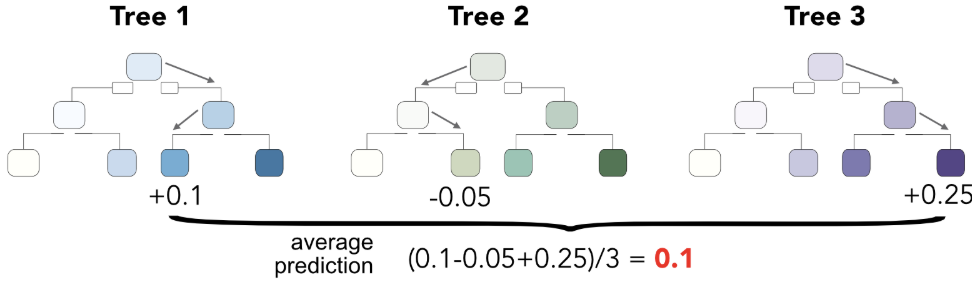

- 랜덤 포레스트: "부트스트랩"이라는 개념을 기반으로 만들어짐 -> 단순트리보다 효율적
(*) 부트스트랩: 통계학/머신러닝에서 사용하는 '복원추출' 기반의 샘플링 기법
-> 원본 데이터셋(크기 N)에서 데이터 하나를 뽑고 값을 기록 => 다시 주머니 => N번 반복하여 원본과 크기가 같은 새로운 데이터셋

(*) 마진 함수
$mg=M^{-1}\sum^M_{m=1}1_{\{h_m(x)=y\}}-max_{j!=y}(M^{-1}\sum^M_{m=1}1_{\{h_m(x)=j\}})$
- 왼쪽: 올바른 클래스에 대한 트리(개별 모델) $h_m$을 기준으로 한 평균 투표 수
- 오른쪽: 다른 클래스에 대한 평균의 최댓값
- 마진: 전체 포레스트가 제대로 분류할 것이라는 신뢰도 반영
- 일반화 오차: $P(mg < 0)$
=> 로 측정한 집계의 부정확도: $\overline{\rho}(1-s^2)=s^2$로 제한됨
- $s$: 개별 분류기의 강도 = $(평균품질)^2$
- $\overline{\rho}$: 학습자 간 평균 상관계수
=> 트리 수가 무한대로 증가함에 따라 부정확도가 어떤 유한한 수에 수렴함 -> 과적합으로 이어지기 어려움

In [13]:
from sklearn.ensemble import RandomForestRegressor
fit_RF=RandomForestRegressor(n_estimators=40, # 랜덤 트리의 개수
                             criterion='squared_error', # 분할 퀄리티 측정을 위한 함수
                             min_samples_split=250, # 최종 클러스터의 최소 사이즈
                             min_samples_leaf=250,
                             bootstrap=True,
                             max_features=30, # 각 트리별 예측 변수의 개수 (30개 정보만 보고 판단)
                             max_samples=10000, # 각 트리별 (랜덤) 샘플의 사이즈
                             )

In [14]:
fit_RF.fit(X_train, y_train) # 모델 피팅
fit_RF.predict(pd.DataFrame(X_test).iloc[0:5,]) # 첫 5개 인스턴스에 대한 예측

array([0.05254375, 0.05254375, 0.05254375, 0.04725082, 0.0524739 ])

(*) 랜덤 포레스트: 개별 학습자를 구축하기 위해 선택한 특성과 인스턴스의 임의적 조합에 의해 만들어짐
=> 위 모델: 각 개별 학습자(트리): 무작위로 선택된 10,000개의 인스턴스(교체 없이)를 기반으로 구축됨 -> 각 최종 잎사귀(클러스터): 최소 240개의 인스턴스 포함해야 함
=> 총 40개의 트리가 결합 & 각 트리: 전체 특성 집합 중 무작위로 선택된 30개의 예측 인자를 기반으로 구축됨

In [15]:
# 모델의 정확도 평가
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test, fit_RF.predict(X_test))
print(f'MSE: {mse}')

hitratio=np.mean(fit_RF.predict(X_test)*y_test>0)
print(f'Hit Ratio: {hitratio}')

MSE: 0.03696447664733151
Hit Ratio: 0.5437414539653601


In [16]:
# 분류 작업을 통한 적중률 개선 여부 
from sklearn.ensemble import RandomForestClassifier
fit_RF_C=RandomForestClassifier(
    n_estimators=40, # 랜덤 트리 개수
    criterion='gini', # 분할의 퀄리티 측정위한 함수
    min_samples_split=250,
    min_samples_leaf=250, # 최종 클러스터의 최소 사이즈
    bootstrap=True,
    max_features=30, # 각 트리별 예측 변수의 개수
    max_samples=20000
)

In [17]:
y_c_train=training_sample['R1M_Usd_C'].values
y_c_test=testing_sample['R1M_Usd_C'].values

fit_RF_C=fit_RF_C.fit(X_train, y_c_train) # 모델 피팅

In [18]:
hitratio=np.mean(fit_RF_C.predict(X_test)==y_c_test)
print(f'Hit Ratio: {hitratio}')

Hit Ratio: 0.4981056289881495


(*) 분류와 회귀 작업을 위해 통상적으로 필요한 예측 인자의 기본 개수: $\sqrt{p}$개 / $\frac{p}{3}$개

(*) Classifier vs Regressor
(i) Classifier: 불순도가 낮게 분류해야 함
(ii) Regressor: 오차가 얼마나 작은가(분산) ~ 방에 모인 데이터들의 숫자 값들이 서로 비슷하게 모여 있어야 함

[6.3] 부스트 트리: 에이다부스트
- 부스팅(Boosting): 불가지론적 결합(agnotic aggregation)에 비해 조금 더 발전한 개념
(+) 랜덤 포레스트: 많은 트리를 통한 분산화가 모델의 전반적인 품질을 향상할 것이라 기대함
=> 부스팅에서는 새로운 트리가 추가될 때마다 모델을 반복적으로 개선하고자 함
(*) 불가지론적 결합: 개별 모델의 구체적인 내용이나 성능 차이를 따지지 않고 단순히 합침
1. Adaboost: 적응형 부스팅 관점: 가장 큰 오류가 발생하는 인스턴스에 점진적으로 집중해 학습 프로세스를 개선
2. Xgboost: 각각의 새 트리가 훈련 샘플 손실을 최소화하는 데 초점을 맞추고 있는 유연한 알고리듬

[6.3.1] 에이다부스트
- 동일 가중치 설정: $w_i=I^{-1}$
- $m=1,...,M$에 대해 
1. 가중치 손실 $sum^I_{i=1}w_iL(l_m(x_i),y_i)$ 최소화하는 학습자 $l_m$(: 트리) 찾기 ~ 손실함수 L: 과제의 종류(회귀 or 분류)에 따라 달라짐
2. 학습자의 가중치 계산: $a_m=f_a(w,l_m(x),y)$
$\\ \rarr\ $ 더 작은 오류를 산출하는 학습자가 더 정확하므로 더 큰 가중치를 가져감
3. 인스턴스 가중치 업데이트: $w_i\ \larr\ w_ie^{f_w(l_m(x_i),y_i)}$
$\\ \rarr\ $ 현재 모델이 제대로 작동하지 못하는(가장 큰 오차를 생성하는) 관측치에 더 높은 가중치를 부여하도록 $f_W$ 설계
4. $w_i$의 총합이 1이 되도록 정규화
- 인스턴스 $x_i$에 대한 출력 변수는 $\sum^M_{m=1}a_ml_m(x_i)$에 대한 단순한 함수
$\\ \tilde{y}_i = f_y \left( \sum_{m=1}^{M} a_m l_m(x_i) \right)$
$\\$=> 모델의 최종 예측: 개별 예측 가중치 합의 부호에 상응 ~ 양수면 +1, o/w -1
- 인스턴스 가중치 적용 방법(i) 손실함수: $V^{(k)}_N(c^{(k)},w)=\sum_{x^{(k)}_i< c^{(k)}}w_i(y_i-m^{k,-}_N(c^{(k)}))^2+\sum_{x^{(k)}_i> c^{(k)}}w_i(y_i-m^{k,+}_N(c^{(k)}))^2$
$\\ \rarr\ $가중치가 큰 인스턴스는 클러스터의 확산 정도에 더 많이 기여하게 됨
- 인스턴스 가중치 적용 방법(ii) 학습자의 훈련: $w_i$와 동일한 분포로 무작위 추출된 샘플을 통해 수행 ~ 가중치 큰 인스턴스가 훈련 샘플에 포함될 확률이 더 높아짐(Original Algorithm)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
fit_adaboost_C=AdaBoostClassifier(DecisionTreeClassifier(
    max_depth=3), # 트리 깊이
    n_estimators=3) # 트리 개수 # 순차적 학습 ~ Sequential
fit_adaboost_C.fit(X_train, y_c_train)

,estimator,DecisionTreeC...r(max_depth=3)
,n_estimators,3
,learning_rate,1.0
,algorithm,'deprecated'
,random_state,None
,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0


In [22]:
from sklearn.metrics import accuracy_score
hitratio=accuracy_score(y_c_test, fit_adaboost_C.predict(X_test))
print(f'Hit Ratio: {hitratio}')

Hit Ratio: 0.5007548997265269


[6.4] 부스트 트리: 익스트림 그래디언트 부스팅
- 학습자의 조합: 랜덤 포레스트에서처럼 불가지론적 x, 학습자 수준에서 조정(최적화)됨
- 각 단계 s에서 모델의 합은 $M_S=\sum^{S-1}_{s=1}m_s+m_S$: 훈련 샘플 상에서 $M_s$의 손실을 줄이도록 마지막 학습자 $m_s$를 정밀하게 설계
- XGBoost가 최소화하고자 하는 목표: $ O=\sum^I_{i=1} loss(y_i,\tilde{y}_i)+\sum^J_{j=1}\Omega(T_j)$
- 1st 항: 실제 레이블과 모델이 출력한 값 사이의 거리 측정
- 2nd 항: 너무 복잡한 모델에 페널티 부여
$\\ \therefore\ O=sum^{I}_{i=1}(y_i-m_{J-1}(x_i)-T_J(x_i))^2+\sum^J_{j=1}\Omega(T_j)$

[6.4.1] 손실 관리
$\\$ if 모든 트리 $T_j$를 $j=1,...,J-1$까지 만듦 ~ 모델: $M_{j-1}
$\\ \rarr$ 최적의 트리 $T_j$ 선택
$\\ O=\sum^{I}_{i=1}\{-2y_iT_J(x_i)+2m_{J-1}(x_i)T_J(x_i)^2\}+\Omega(T_J)+c$: j-1로 인덱싱된 항 -> 최적화 input X => 상수 c에 포함됨
$\\ \rarr$ 더 복잡한 손실 함수: 테일러 전개 사용

[6.4.2] 페널티 적용
$\\$ 주어진 트리 T에 대해 $T(x)=w_{q(x)}$
- $w$: 일부 잎사귀의 출력값
- $q(\cdot)$: 입력변수 x와 그 최종 잎(인덱스)을 매핑하는 함수
- 함수 q: 경로, 벡터 $w=w_i$: 최종 잎사귀의 값(인덱스: $l=1,...,L$)
- 복잡도 in XGBoost: $\Omega(T)=\gamma L+\frac{\lambda}{2}\sum^L_{i=1}w_l^2$
- 1st 항: 전체 잎의 개수 규제
- 2nd 항: 출력값의 크기 규제(분산 줄이는 데 도움이 됨)

두 식 합치면: 
$\\ O=2\sum^I_{i=1}\{-y_iT_J(x_i)+m_{J-1}(x_i)T_J(x_i)+\frac{T_J(x_i)^2}{2}\}+\gamma L+\frac{\lambda}{2}\sum^L_{l=1}w^2_i$
$\\ =2\sum^L_{l=1}(w_l\sum_{i\in I_l}(-y_i+m_{J-1}(x_i))+\frac{w_l^2}{2}\sum_{i \in I_l}(1+\frac{\lambda}{2}))+\gamma L$
$\\$: $w_l=-\frac{a}{b}$에서 최솟값 $-\frac{a^2}{2b}$를 가짐

[6.4.4] 트리 구조
- in 단순 회귀 트리: 각 노드의 출력값: 노드(클러스터) 내 레이블의 평균값
- 새로운 트리를 추가할 때는 노드 값을 완전히 다르게 계산해야 함: 이게 위에 식!
- but 반복적인 트리의 성장: 단순 트리와 비슷한 흐름을 따름
- 각 분할에서 목적 함수를 최소화하는 특성을 선택하기 위해 특성을 테스트 해야함
- Finally, 최적 깊이 & when to stop growth of Tree
$\\ \rarr$ Method:
- 노드별로 진행
- 각 노드에 대해 분할이 유용한지(목적 함수의 관점에서) 그렇지 않은지 살핌: $Gain=\frac{1}{2}(Gain_L+Gain_R-Gain_O)-\gamma$
$\\ \rarr$ 왼/오 이득 & 분할 없을 경우 이득
$\\ \ -\gamma$: 조정 ~ 새 잎은 한 개만 나기 때문에 새로 난 2개에서 원래 1개 빼야 함
$\\ \therefore\ \Delta L=1$, 각 새 잎사귀에 대한 패널티 강도: $\gamma$
- 학습률도 적용함: $\eta \in (0,1]$ ~ 각각의 새로운 트리 스케일링
- 부스팅의 각 단계 후에 새로운 트리 $T_J$: 그 값이 $\eta$과의 곱에 의해 할인됨
$\\ \rarr$ 매우 유용: 최적화된 트리 단순 결합: 훈련 샘플 과적합임

[6.4.5] 확장
$\\$부스트 트리의 과적합 방지:
- DART(Dropout for Additive Regression Tree)모델: 훈련 도중 지정된 수의 트리 생략
- 단조성 제약 조건(in XGB, lightgbm): 때로는 특정 특성 하나가 레이블에 단조로운 영향 미칠 것으로 예상 가능
- By 분할 알고리듬의 재귀적 특성, 특정 변수에 따라 분할을 수행할 시기와 그렇지 않을 시기 선택 가능
$\\ \rarr$ 위의 모든 분할에서 설정된 평균값 중요: 하위 분할의 향후 평균값에 대한 허용 가능 범위 제시
$\\ \rarr$ if 분할이 범위 위반, 해당 분할은 무시되고 다른 변수가 선택됨

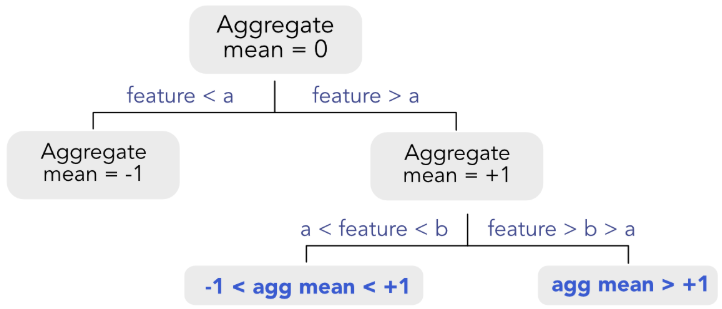

In [24]:
!pip install xgboost

   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   - -------------------------------------- 2.6/72.0 MB 29.5 MB/s eta 0:00:03
   ---- ----------------------------------- 7.3/72.0 MB 26.2 MB/s eta 0:00:03
   ------ --------------------------------- 11.8/72.0 MB 23.0 MB/s eta 0:00:03
   ---------- ----------------------------- 19.4/72.0 MB 27.0 MB/s eta 0:00:02
   -------------- ------------------------- 27.0/72.0 MB 28.8 MB/s eta 0:00:02
   ------------------- -------------------- 34.9/72.0 MB 30.4 MB/s eta 0:00:02
   ----------------------- ---------------- 42.7/72.0 MB 31.4 MB/s eta 0:00:01
   ---------------------------- ----------- 50.6/72.0 MB 32.4 MB/s eta 0:00:01
   -------------------------------- ------- 58.5/72.0 MB 33.1 MB/s eta 0:00:01
   ----------------------------------- ---- 63.4/72.0 MB 32.2 MB/s eta 0:00:01
   -------------------------------------- - 69.5/72.0 MB 31.7 MB/s eta 0:00:01
   ---------------------------------------  71.8/72.0 MB 31.6 M

In [ ]:
# XGBoost 모델
# 훈련시간 단축위해 가장 극단적인 관측치 40%(레이블 값 기준 상하위 20%)만 유지하고 특성에 대한 작은 하위 집합으로 작업
# 훈련 데이터 처리
import xgboost as xgb # 부스팅 트리 위한 패키지
data_ml['R1M_Usd_quantile']=data_ml.groupby('date')['R1M_Usd'].transform(
    lambda x: pd.qcut(x, 100, labels=False,
                      duplicates=('drop'), precision=50)
)
from Ch1 import separation_date, features_short
separation_mask=data_ml['date'] < separation_date

boolean_quantile=(
    data_ml.loc[separation_mask]['R1M_Usd_quantile'].values<=20)|(
        data_ml.loc[separation_mask]['R1M_Usd_quantile'].values>=80
    )

train_features_xgb=training_sample.loc[boolean_quantile, features_short]
train_label_xgb=training_sample.loc[boolean_quantile,'R1M_Usd']
train_matrix_xgb=xgb.DMatrix(train_features_xgb, label=train_label_xgb)

C:\Users\82103\AppData\Local\Temp\ipykernel_11772\1328130940.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ml['R1M_Usd_quantile']=data_ml.groupby('date')['R1M_Usd'].transform(


In [26]:
# 단조성 제약 조건
# 1. 시가총액(음수 ~ 대형주 수익률이 더 낮음)
# 2. 장부가 대비 주가 비율(음수 ~ 고평가 주식 수익률 더 낮음)
# 3. 과거 연간 수익률(양수 ~ 패자주보다 승자주가 초과 성과를 냄)
mono_const="(0,0,-1,1,0,-1,0)" # 백터 초기화

In [ ]:
params={'eta':0.3,
        'objective':'reg:squarederror', #목적함수
        'max_depth':4, # 각 트리 최고 깊이
        'subsample':0.6, # 샘플 중 무작위로 60% 선택해 훈련
        'colsample_bytree':0.7, # 예측 인자 중 무작위로 70% 선택해 훈련
        'lambda':1,
        'gamma':0.1,
        'nrounds':30, # 사용한 트리 개수
        'monotone_constraints': mono_const, # 단조성 제약 조건: 상식 주입 과정
        'rate_drop': 0.1, # DART 위한 드롭률
        'verbose':0
        }

In [28]:
fit_xgb=xgb.train(params, train_matrix_xgb)

c:\Users\82103\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [16:45:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "nrounds", "rate_drop", "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [ ]:
test_features_xgb=testing_sample[features_short]
test_matrix_xgb=xgb.DMatrix(test_features_xgb, label=y_test) # 정답 안넣어도 예측 작동은 상관 x
fit_xgb.predict(test_matrix_xgb)
mse=np.mean((fit_xgb.predict(test_matrix_xgb)-y_test)**2)
print(f'MSE: {mse}')

hitratio=np.mean(fit_xgb.predict(test_matrix_xgb)*y_test>0)
print(f'Hit Ratio: {hitratio}')

MSE: 0.03670911876425447
Hit Ratio: 0.5125341841385597


In [32]:
# XGBoost 하에서 분류 작업: 레이블은 정확히 0부터 시작하는 정수로 코딩
train_label_xgb_C=training_sample.loc[boolean_quantile,'R1M_Usd_C']
train_matrix_xgb_C=xgb.DMatrix(train_features_xgb, label=train_label_xgb_C)

In [33]:
params_C={
    'eta':0.8,
    'objective':'multi:softmax', # 목적 함수(in 범주, 손실 함수: generally 소프트맥스)
    'max_depth':4,
    'num_class':2,
    'nrounds':10,
    'verbose':0
}
fit_xgb_C=xgb.train(params_C, train_matrix_xgb_C)

c:\Users\82103\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [16:56:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "nrounds", "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [34]:
hitratio=np.mean(fit_xgb_C.predict(test_matrix_xgb)==y_c_test)
print(f'Hit Ratio: {hitratio}')

Hit Ratio: 0.49549908842297175


In [ ]:
# 인스턴스 가중치 부여: 가중치 W_i=W_i(x_i) -> 특성 값에 따라 달라질 수 있음 ~ 특정한 특성의 특정 조건에 중요성 부여
inst_weights=np.random.uniform(0,1,(train_features_xgb.shape[0],1)) # 여기서는 가중치 조건을 안줌
train_matrix_xgb=xgb.DMatrix(train_features_xgb, label=train_label_xgb, weight=inst_weights)

(*) 실무적으로 랜덤 포레스트 & 부스트 트리가 가장 좋은 선택임